## Home 2: Machine Learning for Regression

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2.1 Data preparation

In [33]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [34]:
!wget $data

--2025-10-08 18:57:16--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.009s  

2025-10-08 18:57:16 (97.7 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [35]:
df = pd.read_csv(data)

In [36]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## 2.1 Required columns

In [67]:
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df_filtered = df[columns].copy()
df_filtered

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


## 2.2 Missing values

In [88]:
missing_counts = df_filtered.isnull().sum()
q1_answer = missing_counts.idxmax()
q1_answer

'horsepower'

## 2.3 Median for horse power 

In [92]:
median_hp = df['horsepower'].median()
median_hp

np.float64(149.0)

## 2.4 Setting up the validation framework

In [98]:
n = len(df) # Length of the df_filtered frame

n_val = int(n * 0.2) # Size of the validation dataset
n_test = int(n * 0.2) # Size of the testing dataset
n_train = n - n_val - n_test # Size of the train dataset

In [99]:
n, n_val + n_test + n_train

(9704, 9704)

In [100]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [120]:
df.iloc[[10, 0, 3, 5]]

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
10,230,5.0,100.0,3111.810181,15.4,2014,Europe,Diesel,All-wheel drive,0.0,13.386605
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
5,190,3.0,NaN,2484.883986,14.7,2008,Europe,Gasoline,All-wheel drive,-1.0,17.271818


In [121]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [122]:
idx = np.arange(n)

In [123]:
np.random.shuffle(idx)

In [124]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [125]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
8438,220,2.0,153.0,2298.496909,16.8,2003,Asia,Gasoline,Front-wheel drive,-1.0,17.947667
5758,240,2.0,155.0,3588.038933,11.7,2000,Asia,Gasoline,Front-wheel drive,-1.0,12.334119
3672,150,4.0,133.0,2853.968434,16.2,2016,USA,Diesel,Front-wheel drive,-1.0,15.635865
708,190,3.0,173.0,3247.637370,17.9,2000,Asia,Diesel,Front-wheel drive,0.0,14.465277
4778,280,7.0,148.0,3594.080875,17.5,2015,USA,Gasoline,All-wheel drive,0.0,11.580682


In [126]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [127]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [128]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [130]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [135]:
len(y_train)

5824

## 2.5 Training a linear regression model

In [164]:
x = [ 
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
    
]
x = np.array(x)
x

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [165]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [169]:
def train_linear_regression(x, y):
    ones = np.ones(x.shape[0])
    x = np.column_stack([ones, x])

    XT = np.transpose(x)
    XTX = np.dot(XT,x)
    XTX_inv = np.linalg.pinv(XTX)
    XTy = np.dot(XT, y)
    w_full = dot(XTX_inv, XTy)

    return w_full[0], w_full[1:]

In [170]:
train_linear_regression(x, y)

(np.float64(300.0677669240706), array([-0.22774253, -2.5769413 , -0.02301206]))

## 2.6 Fuel Efficiency

In [171]:
df_train.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors'],
      dtype='object')

In [172]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [174]:
x_train = df_train[base].values

In [175]:
x_train = df_train[base].fillna(0).values

In [178]:
y_train

array([2.94168078, 2.5903261 , 2.81156088, ..., 2.72884092, 2.86915064,
       3.01505233], shape=(5824,))

In [179]:
w0, w = train_linear_regression(x_train, y_train)

In [180]:
y_pred = w0 + x_train.dot(w)

<Axes: ylabel='Count'>

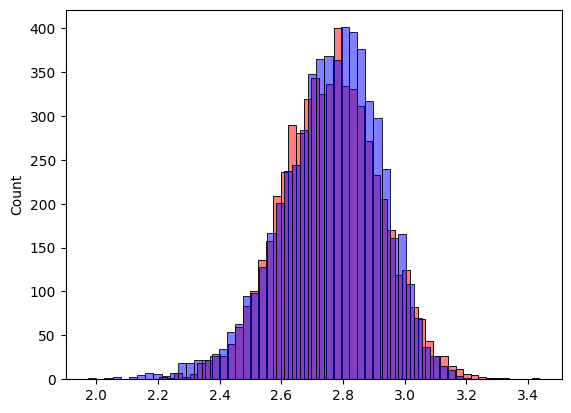

In [181]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)

## 2.7 RMSE

In [183]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [184]:
rmse(y_train, y_pred)

np.float64(0.03882428144568759)

## 2.8 Validating the model

In [185]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [186]:
x_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(x_train, y_train)

y_pred = w0 + x_train.dot(w)

In [190]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    x = df_num.values
    return x

In [191]:
x_tarin = prepare_X(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_X(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.041003154499381696)

<Axes: ylabel='Count'>

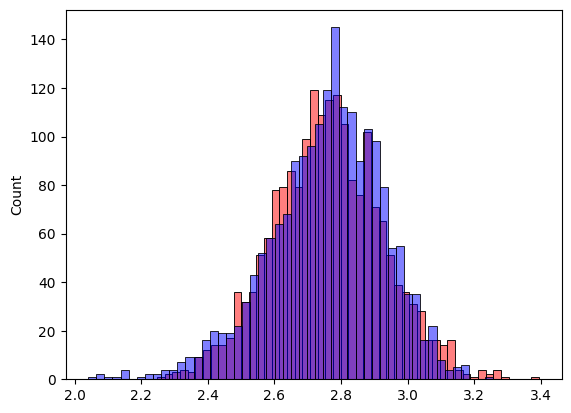

In [192]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_val, color="blue", alpha=0.5, bins=50)

In [193]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X) 
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [195]:
x_train = prepare_X(df_train)

In [196]:
x_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(x_train, y_train, r=0.01)

x_val = prepare_X(df_val)
y_pred = w0 + x_val.dot(w)


rmse(y_val, y_pred)

np.float64(0.04094846910838411)

## 2.9 Tuning the model

In [198]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    x_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(x_train, y_train, r=0.01)

    x_val = prepare_X(df_val)
    y_pred = w0 + x_val.dot(w)

    score = rmse(y_val, y_pred)

    print(r, w0, score)

0 3.229130755898575 0.04094846910838411
0.001 3.229130755898575 0.04094846910838411
0.01 3.229130755898575 0.04094846910838411
0.1 3.229130755898575 0.04094846910838411
1 3.229130755898575 0.04094846910838411
10 3.229130755898575 0.04094846910838411


In [200]:
r = 0.01
x_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(x_train, y_train, r=0.01)

x_val = prepare_X(df_val)
y_pred = w0 + x_val.dot(w)

score = rmse(y_val, y_pred)
score

np.float64(0.04094846910838411)

## 2.10 Using the model

In [201]:
df_full_train = pd.concat([df_train, df_val])

In [202]:
df_full_train = df_full_train.reset_index(drop=True)

In [204]:
X_full_train = prepare_X(df_full_train)

In [205]:
X_full_train

array([[ 220.        ,  153.        , 2298.49690879, 2003.        ],
       [ 240.        ,  155.        , 3588.03893265, 2000.        ],
       [ 150.        ,  133.        , 2853.96843442, 2016.        ],
       ...,
       [ 240.        ,  105.        , 3262.57990608, 2008.        ],
       [ 160.        ,  141.        , 3674.0176585 , 2012.        ],
       [ 160.        ,  162.        , 3012.96010389, 2022.        ]],
      shape=(7764, 4))

In [206]:
y_full_train = np.concatenate([y_train, y_val])

In [208]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.01)

In [210]:
x_test = prepare_X(df_test)
y_pred = w0 + x_test.dot(w)

score = rmse(y_test, y_pred)
score

np.float64(0.03762678273507043)

In [213]:
car_fuel_efficiency = df_test.iloc[20].to_dict()
car_fuel_efficiency

{'engine_displacement': 150,
 'num_cylinders': 4.0,
 'horsepower': 131.0,
 'vehicle_weight': 2674.061275158312,
 'acceleration': 15.4,
 'model_year': 2010,
 'origin': 'USA',
 'fuel_type': 'Diesel',
 'drivetrain': 'All-wheel drive',
 'num_doors': 0.0}

In [214]:
df_small = pd.DataFrame([car_fuel_efficiency])
df_small

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,150,4.0,131.0,2674.061275,15.4,2010,USA,Diesel,All-wheel drive,0.0


In [216]:
x_small = prepare_X(df_small) 

In [217]:
y_pred = w0 + x_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(2.862022323666551)